In [40]:
#Import packages:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, r2_score, classification_report
from sklearn.datasets import make_classification 
from sklearn.inspection import permutation_importance


In [7]:
#import data
redimportedData ='red_wine_scaled.csv'
red_wine = pd.read_csv(redimportedData, index_col = False)
whiteimportedData ='white_wine_scaled.csv'
white_wine = pd.read_csv(whiteimportedData, index_col = False)

In [8]:
red_wine.head()

,Unnamed: 0,Unnamed: 0.1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qual_bin
0,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
white_wine.head()

,Unnamed: 0,Unnamed: 0.1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qual_bin
0,0,1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,2,1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,3,1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,4,1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


Red Wines


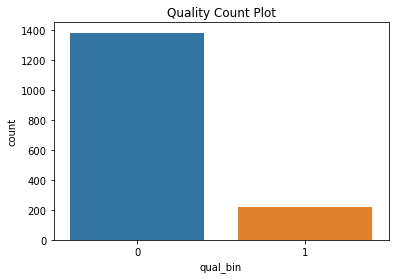

In [10]:
# What % of each wine type is considered high quality (7
print("Red Wines")
sns.countplot(data = red_wine, x = 'qual_bin')
plt.title('Quality Count Plot')
plt.show()
# approx 15% of red wines are high grade

White Wines


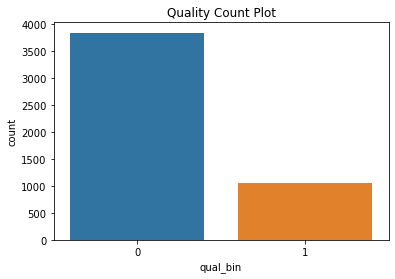

In [11]:
print("White Wines")
sns.countplot(data = white_wine, x = 'qual_bin')
plt.title('Quality Count Plot')
plt.show()
# approx 25% of white wines are high grade

In [12]:
# what levels of each feature are in high quality wines? 
high_red_wine = red_wine[red_wine.qual_bin == 1]
high_white_wine = white_wine[white_wine.qual_bin == 1]

In [13]:
high_red_wine.describe()

,Unnamed: 0,Unnamed: 0.1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qual_bin
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,830.714286,830.714286,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,389.737485,389.737485,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,7.000000,7.000000,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,481.000000,481.000000,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,938.000000,938.000000,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,1088.000000,1088.000000,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,1584.000000,1584.000000,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


In [14]:
high_white_wine.describe()

,Unnamed: 0,Unnamed: 0.1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qual_bin
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.0
mean,2424.192453,4023.192453,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,1.0
std,1376.592862,1376.592862,0.768798,0.094097,0.080288,4.290845,0.011145,13.797146,32.724848,0.002772,0.157185,0.133044,1.255209,0.0
min,13.000000,1612.000000,3.900000,0.080000,0.010000,0.800000,0.012000,5.000000,34.000000,0.987110,2.840000,0.220000,8.500000,1.0
25%,1172.500000,2771.500000,6.200000,0.190000,0.280000,1.800000,0.031000,25.000000,101.000000,0.990500,3.100000,0.400000,10.700000,1.0
50%,2613.500000,4212.500000,6.700000,0.250000,0.310000,3.875000,0.037000,33.000000,122.000000,0.991730,3.200000,0.480000,11.500000,1.0
75%,3519.500000,5118.500000,7.200000,0.320000,0.360000,7.400000,0.044000,42.000000,146.000000,0.993605,3.320000,0.580000,12.400000,1.0
max,4896.000000,6495.000000,9.200000,0.760000,0.740000,19.250000,0.135000,108.000000,229.000000,1.000600,3.820000,1.080000,14.200000,1.0


<AxesSubplot:>

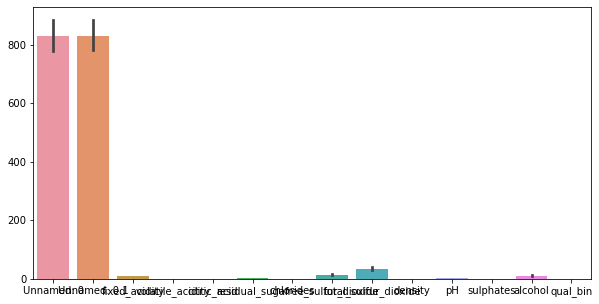

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=None, y=None, data=high_red_wine)

<AxesSubplot:>

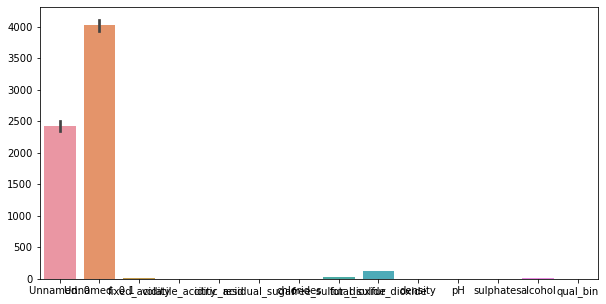

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=None, y=None, data=high_white_wine)

In [17]:
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_wine.drop(columns='qual_bin'), 
                                                    red_wine.qual_bin, test_size=0.3, random_state=47, shuffle=True)
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_wine.drop(columns='qual_bin'), 
                                                    white_wine.qual_bin, test_size=0.3, random_state=47, shuffle=True)

Text(0.5, 0, 'Random Forest Feature Importance - Reds')

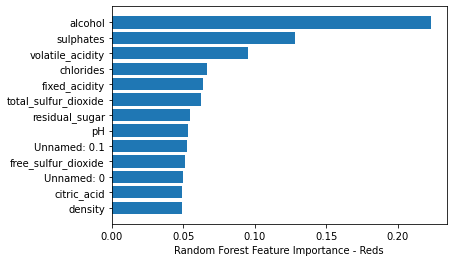

In [18]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(red_X_train, red_y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(red_wine.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance - Reds")
# High alcohol content, sulphates (anti_microbial) and lower volatile acidity (high=vinagar taste) appear to be the top three important features for red wine quality

Text(0.5, 0, 'Random Forest Feature Importance - Whites')

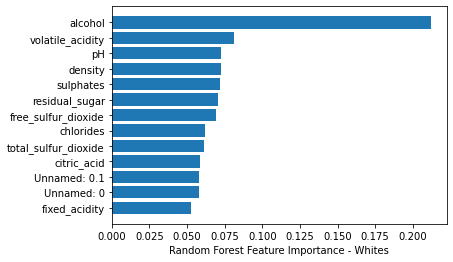

In [19]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(white_X_train, white_y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(white_wine.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance - Whites")
# High alcohol content, lower volatile acidity and higher residual sugar appear to be the top three important features for white wine quality

In [20]:
#Apply Decision Tree model to the training data and score:
red_model = DecisionTreeClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Decision Tree Classifier')
print('Red: ', red_model_score)
white_model = DecisionTreeClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Decision Tree Classifier
Red:  0.8604166666666667
White:  0.827891156462585


In [21]:
#Predict using the model and create confusion matrix again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[376  34]
 [ 33  37]]
White Confusion Matrix
[[1035  131]
 [ 122  182]]


In [22]:
#Apply Random Forest model to the training data and score:
red_model = RandomForestClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Random Forest Classifier')
print('Red: ', red_model_score)
white_model = RandomForestClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Random Forest Classifier
Red:  0.90625
White:  0.8843537414965986


In [23]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[401   9]
 [ 36  34]]
White Confusion Matrix
[[1126   40]
 [ 130  174]]


In [24]:
#Apply  Gradient Boosting Classifier model to the training data and score:
red_model = GradientBoostingClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Gradient Boosting Classifier')
print('Red: ', red_model_score)
white_model = GradientBoostingClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Gradient Boosting Classifier
Red:  0.8729166666666667
White:  0.8503401360544217


In [25]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[386  24]
 [ 37  33]]
White Confusion Matrix
[[1101   65]
 [ 155  149]]


In [26]:
#Apply KNeighborsClassifier model to the training data and score:
red_model = KNeighborsClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('KNeighbors Classifier')
print('Red: ', red_model_score)
white_model = KNeighborsClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

KNeighbors Classifier
Red:  0.8520833333333333
White:  0.7748299319727892


In [27]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[402   8]
 [ 63   7]]
White Confusion Matrix
[[1037  129]
 [ 202  102]]


In [28]:
#Apply GaussianNB model to the training data and score:
red_model = GaussianNB()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('GaussianNB Classifier')
print('Red: ', red_model_score)
white_model = GaussianNB()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

GaussianNB Classifier
Red:  0.8583333333333333
White:  0.7891156462585034


In [29]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[365  45]
 [ 23  47]]
White Confusion Matrix
[[987 179]
 [131 173]]


In [30]:
#Apply SVC model to the training data and score:
red_model = SVC()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('SVC Classifier')
print('Red: ', red_model_score)
white_model = SVC()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

SVC Classifier
Red:  0.8541666666666666
White:  0.7931972789115647


In [31]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[410   0]
 [ 70   0]]
White Confusion Matrix
[[1166    0]
 [ 304    0]]


I applied different ML models above and evaluated their performance for both red and white wine test data and tabulated the scores and put them in a confusion matrix. The Random Forest model appears to be the best for both red and white wines. So, I will perform a gridsearch hyperparameter tuning for that model as well determine the ROC_AUC scores and ROC curve.

In [32]:
#build param grid features
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_sample_split = [2, 5]
min_sample_leaf = [1, 2]
bootstrap = [True, False]

In [33]:
param_grid = {'n_estimators' : n_estimators, 
              'max_features' : max_features, 
              'max_depth' : max_depth, 
              'min_samples_split' : min_sample_split, 
              'min_samples_leaf' : min_sample_leaf, 
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [34]:
#GridSearchCV
rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = 4)
red_gs = gs.fit(red_X_train, red_y_train)
white_gs = gs.fit(white_X_train, white_y_train)

print('Red:')
print(red_gs.best_estimator_)
print(red_gs.best_score_)

print('White:')
print(white_gs.best_estimator_)
print(white_gs.best_score_)


Red:
RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=56)
0.8316877315386124
White:
RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=56)
0.8316877315386124


In [35]:
#Fitting the Random forest model with the optimal hyperparameters
rf = RandomForestClassifier(n_estimators = 48, max_features = 'sqrt' , max_depth = 4, min_samples_split = 5, bootstrap = False)
rf.fit(red_X_train, red_y_train)
red_y_pred = rf.predict(red_X_test)
red_acc = accuracy_score(red_y_test, red_y_pred)
red_cv = cross_val_score(rf, red_X_test, red_y_test, scoring = 'roc_auc').mean()
print('Red:')
print("Accuracy Score: ", red_acc)
print("CV Score: ", red_cv)
print(" ")
print('White:')
rf.fit(white_X_train, white_y_train)
white_y_pred = rf.predict(white_X_test)
white_acc = accuracy_score(white_y_test, white_y_pred)
white_cv = cross_val_score(rf, white_X_test, white_y_test, scoring = 'roc_auc').mean()
print("Accuracy Score: ", white_acc)
print("CV Score: ", white_cv)

Red:
Accuracy Score:  0.875
CV Score:  0.882404181184669
 
White:
Accuracy Score:  0.8183673469387756
CV Score:  0.8279427750927433


With wines, you want a high accuracy

In [38]:
#ROC-AUC Score
red_y_scores_rf = rf.predict_proba(red_X_test)
red_y_scores_rf = red_y_scores_rf[:,1]
red_auroc = roc_auc_score(red_y_test, red_y_scores_rf)
print("Red ROC-AUC Score:", red_auroc)

white_y_scores_rf = rf.predict_proba(white_X_test)
white_y_scores_rf = white_y_scores_rf[:,1]
white_auroc = roc_auc_score(white_y_test, white_y_scores_rf)
print("White ROC-AUC Score:", white_auroc)

Red ROC-AUC Score: 0.767369337979094
White ROC-AUC Score: 0.8557469870000904


Red wine


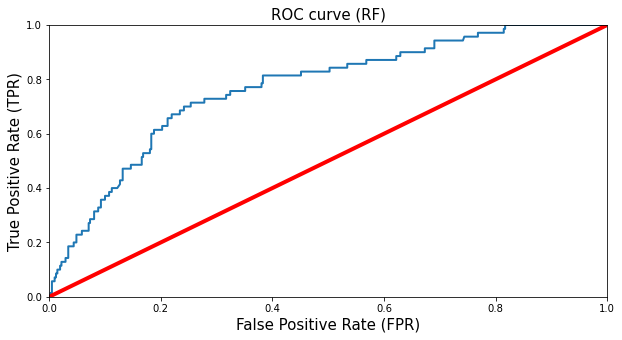

In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(red_y_test, red_y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

print('Red wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("red_roc_curve_RF.jpg")
plt.show()
# TPR starts leveling off around .3 FPR

White wine


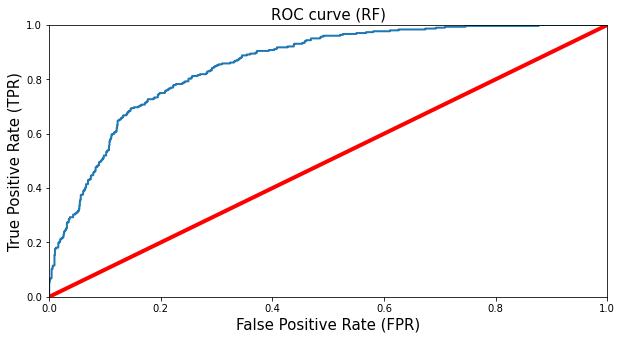

In [42]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(white_y_test, white_y_scores_rf)
print('White wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("white_roc_curve_RF.jpg")
plt.show()
# TPR starts leveling off around .2 FPR

In [39]:
# Classification Reports
print("Red: ")
print(classification_report(red_y_test, red_y_pred))
print(" ")
print("White: ")
print(classification_report(white_y_test, white_y_pred))

Red: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       410
           1       0.75      0.21      0.33        70

    accuracy                           0.88       480
   macro avg       0.82      0.60      0.63       480
weighted avg       0.86      0.88      0.84       480

 
White: 
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1166
           1       0.80      0.16      0.27       304

    accuracy                           0.82      1470
   macro avg       0.81      0.58      0.58      1470
weighted avg       0.82      0.82      0.77      1470

